According to WHO, stroke is the second leading cause of death in the world. One in four people have the potential to suffer from the disease. Thus, a model is needed to predict the potential of a patient suffering from stroke. Predictions are based on relevant inputs, namely data on the medical condition of each patient.

Data Source: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Size: 310 kb 

# Import Libraries

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.0 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load Data

In [ ]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Cleaning



## Missing Values Handling

In [ ]:
# check missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

As BMI is relatively different for each patient and is considered a factor with a quite high impact on the disease, it would be a miss to handle it with either median or mean. Therefore, I decided to drop the rows with nan value of BMI.

In [ ]:
# drop all rows with missing values
df=df.dropna()
df=df.dropna(axis=0)

In [ ]:
# reset index
df=df.dropna().reset_index(drop=True)

In [ ]:
# check missing values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4909 entries, 0 to 4908
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 460.3+ KB


## Remove Outliers in Numerical Data

### Age

In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['age'])

,sub,values
0,IQR,35.0
1,Upper Bound,112.5
2,Lower Bound,-27.5
3,Sum outliers,0.0
4,percentage outliers,0.0


Skewness: -0.119070
Kurtosis: -0.988091


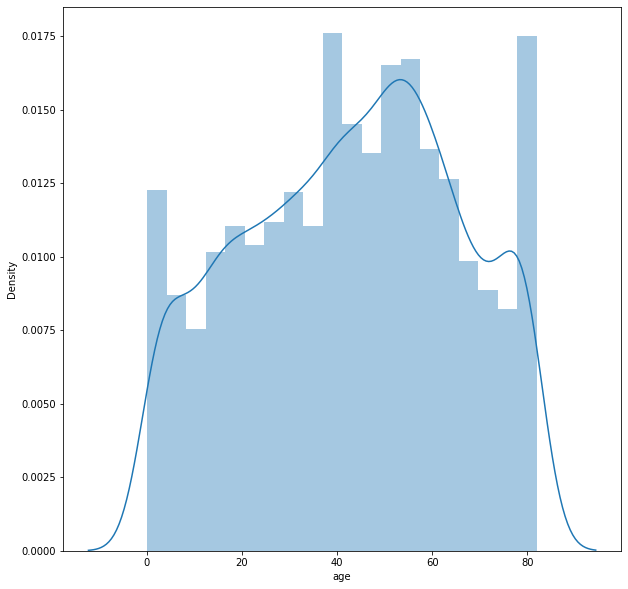

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(df['age'])

print("Skewness: %f" % df['age'].skew())
print("Kurtosis: %f" % df['age'].kurt())

### Hypertension

In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['hypertension'])

,sub,values
0,IQR,0.000000
1,Upper Bound,0.000000
2,Lower Bound,0.000000
3,Sum outliers,451.000000
4,percentage outliers,9.187207


Hypertensi merupakan data kategorikal yang dirubah menjadi data numerikal 0 (No) dan 1 (Yes) sehingga tidak dilakukan remove outliers.

### Heart Disease

In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['heart_disease'])

,sub,values
0,IQR,0.000000
1,Upper Bound,0.000000
2,Lower Bound,0.000000
3,Sum outliers,243.000000
4,percentage outliers,4.950092


Skewness: 4.155030
Kurtosis: 15.270496


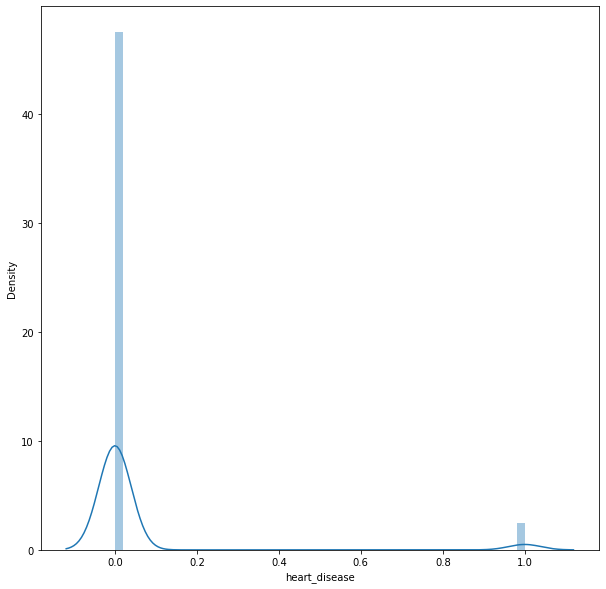

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(df['heart_disease'])

print("Skewness: %f" % df['heart_disease'].skew())
print("Kurtosis: %f" % df['heart_disease'].kurt())

Heart Disease merupakan data kategorikal yang dirubah menjadi data numerikal 0 (No) dan 1 (yes) sehingga tidak dilakukan remove outliers.

### Average Glucose Level

In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['avg_glucose_level'])

,sub,values
0,IQR,36.500000
1,Upper Bound,168.320000
2,Lower Bound,22.320000
3,Sum outliers,567.000000
4,percentage outliers,11.550214


Skewness: 1.614026
Kurtosis: 1.905601


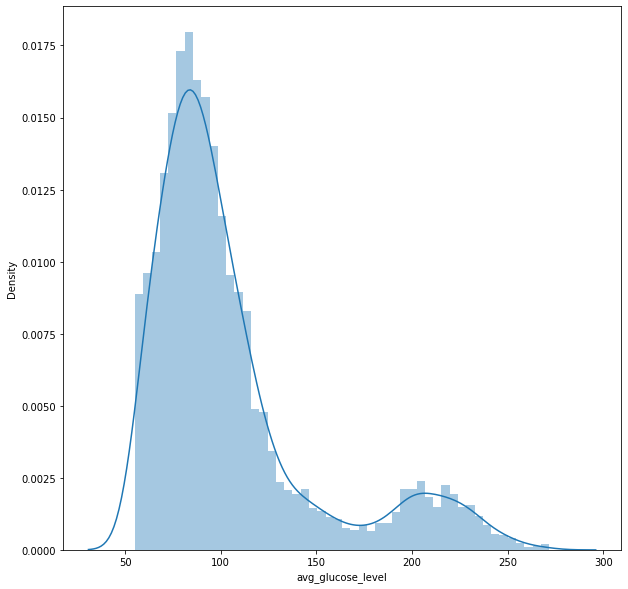

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(df['avg_glucose_level'])

print("Skewness: %f" % df['avg_glucose_level'].skew())
print("Kurtosis: %f" % df['avg_glucose_level'].kurt())

In [ ]:
print(f'Row counts before removing outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

#proses drop outliers pada numerical_feats (kecuali pada feature Checkin service, Departure Delay in Minutes dan Arrival Delay in Minutes) 
numerical_feats_del = ['avg_glucose_level']
for col in numerical_feats_del:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Row counts after removing outlier: {len(df)}')

Row counts before removing outlier: 4909
Row counts after removing outlier: 4342


Skewness: 0.839205
Kurtosis: 0.569337


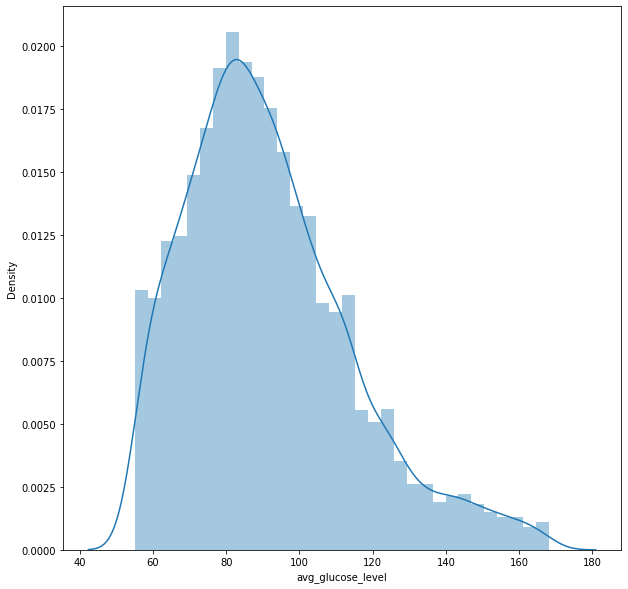

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(df['avg_glucose_level'])

print("Skewness: %f" % df['avg_glucose_level'].skew())
print("Kurtosis: %f" % df['avg_glucose_level'].kurt())

### BMI

In [ ]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(df['bmi'])

,sub,values
0,IQR,9.300000
1,Upper Bound,46.350000
2,Lower Bound,9.150000
3,Sum outliers,90.000000
4,percentage outliers,2.072778


Skewness: 1.121409
Kurtosis: 4.043474


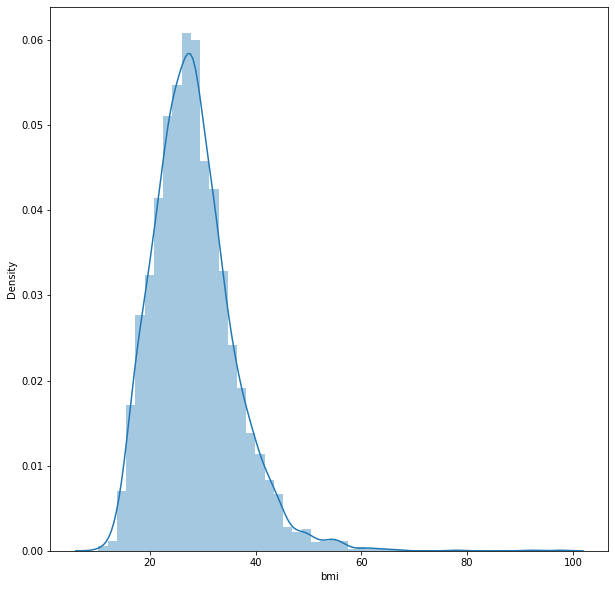

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(df['bmi'])

print("Skewness: %f" % df['bmi'].skew())
print("Kurtosis: %f" % df['bmi'].kurt())

## Drop Feature ID

In [ ]:
df.drop('id', axis = 1, inplace = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4904,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4905,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4907,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# EDA

## Determine Data Object

Berdasarkan objektif bisnis, maka target variabel adalah fitur 'stroke' dan sisanya merupakan variabel predictor kecuali fitur 'id' karena tidak diperlukan dan mengihindari overfitting.

In [ ]:
x = df.drop(columns = ["stroke"])
y = df["stroke"]

<function matplotlib.pyplot.show>

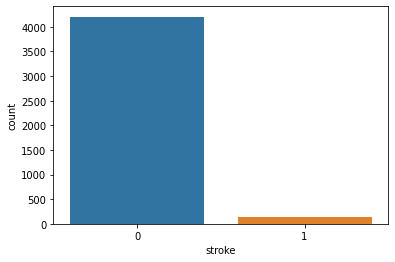

In [ ]:
sns.countplot('stroke', data=df)
plt.show

1 : If the patient had a stroke

0 : No

In [ ]:
df['stroke'].value_counts()

0    4206
1     136
Name: stroke, dtype: int64

## Analyzing Features

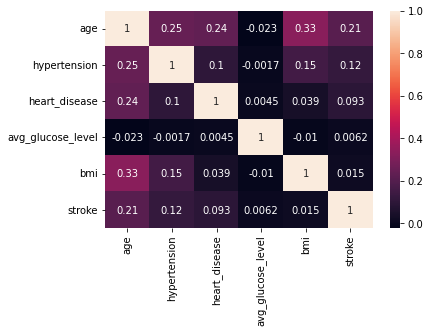

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot = True)

plt.show()

### Gender

In [ ]:
df.groupby(['gender','stroke'])['stroke'].count()

gender  stroke
Female  0         2515
        1           82
Male    0         1690
        1           54
Other   0            1
Name: stroke, dtype: int64

In [ ]:
# drop rows with gender = other
df = df[df.gender != 'Other']

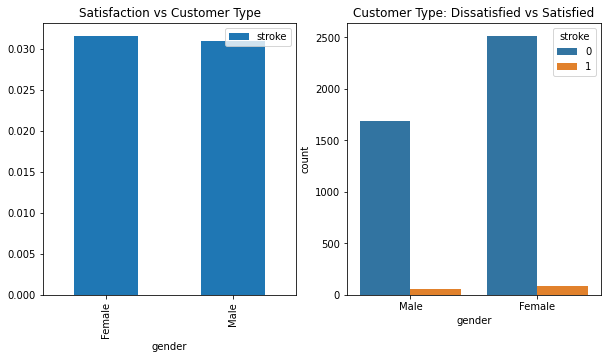

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df[['gender','stroke']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Satisfaction vs Customer Type')
sns.countplot('gender',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Customer Type: Dissatisfied vs Satisfied')
plt.show()

**Analysis**

Women patient is most likely suffer from stroke 

### Age

In [ ]:
df.groupby(['age','stroke'])['stroke'].count()

age    stroke
0.08   0          2
0.16   0          3
0.24   0          5
0.32   0          5
0.40   0          2
                 ..
80.00  1         12
81.00  0         36
       1         10
82.00  0         34
       1          5
Name: stroke, Length: 147, dtype: int64

In [ ]:
print('Oldest Patient was of:',df['age'].max(),'Years')
print('Youngest Patient was of:',df['age'].min(),'Years')
print('Average Age of Patients:',df['age'].mean(),'Years')

Oldest Patient was of: 82.0 Years
Youngest Patient was of: 0.08 Years
Average Age of Patients: 40.608495738309145 Years


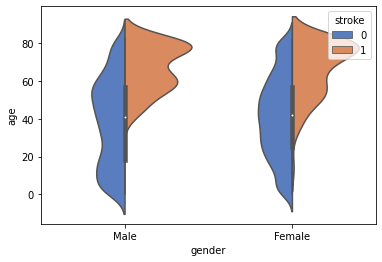

In [ ]:
ax = sns.violinplot(x="gender", y="age", hue="stroke",
                    data=df, palette="muted", split=True)

**Analysis**

Stroke occurs in female patients over 20 and in men over 30 years of age

### Hypertension

0: Patient doesn't have hypertension

1: Patient has hypertension

In [ ]:
df.groupby(['hypertension','stroke'])['stroke'].count()

hypertension  stroke
0             0         3935
              1          104
1             0          270
              1           32
Name: stroke, dtype: int64

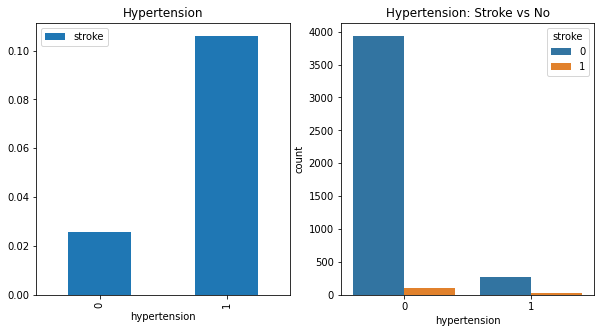

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df[['hypertension','stroke']].groupby(['hypertension']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Hypertension')
sns.countplot('hypertension',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Hypertension: Stroke vs No')
plt.show()

**Analysis**

Patients with hypertension tend to have strokes compared to patients without hypertension

### Heart Disease

0: Patient doesn't have any heart disease

1: Patient has a heart disease

In [ ]:
df.groupby(['heart_disease','stroke'])['stroke'].count()

heart_disease  stroke
0              0         4067
               1          118
1              0          138
               1           18
Name: stroke, dtype: int64

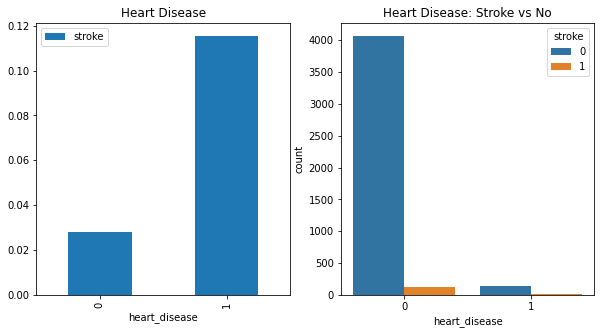

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df[['heart_disease','stroke']].groupby(['heart_disease']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Heart Disease')
sns.countplot('heart_disease',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Heart Disease: Stroke vs No')
plt.show()

**Analysis**

Patients with liver disease are more likely to have strokes than patients without liver disease

### Marriage Status

In [ ]:
df.groupby(['ever_married','stroke'])['stroke'].count()

ever_married  stroke
No            0         1618
              1           19
Yes           0         2587
              1          117
Name: stroke, dtype: int64

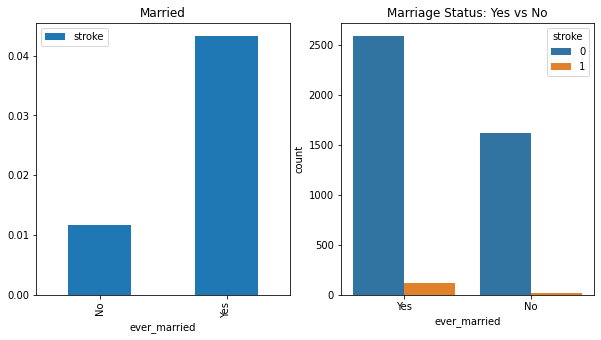

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df[['ever_married','stroke']].groupby(['ever_married']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Married')
sns.countplot('ever_married',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Marriage Status: Yes vs No')
plt.show()

**Analysis**

Patients who have been or have been married are more likely to experience stroke than patients who have never been married

### Work Type

In [ ]:
df.groupby(['work_type', 'stroke'])['stroke'].count()

work_type      stroke
Govt_job       0          525
               1           18
Never_worked   0           22
Private        0         2400
               1           78
Self-employed  0          597
               1           39
children       0          661
               1            1
Name: stroke, dtype: int64

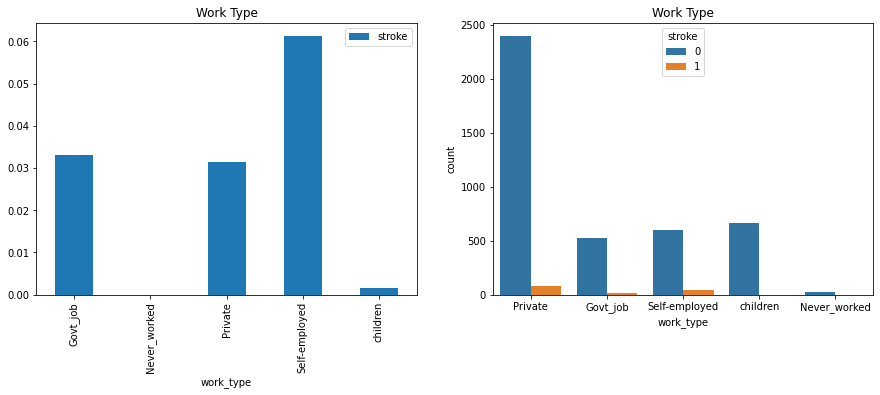

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[['work_type','stroke']].groupby(['work_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Work Type')
sns.countplot('work_type',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Work Type')
plt.show()

**Analysis**

The most likely to suffer from stroke is patient with self-employed jobs

### Residence Type

In [ ]:
df.groupby(['Residence_type', 'stroke'])['stroke'].count()

Residence_type  stroke
Rural           0         2074
                1           67
Urban           0         2131
                1           69
Name: stroke, dtype: int64

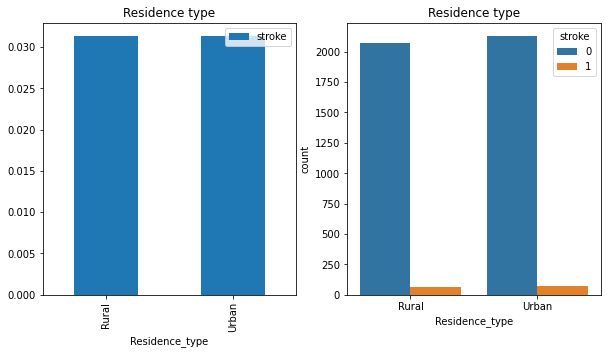

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df[['Residence_type','stroke']].groupby(['Residence_type']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Residence type')
sns.countplot('Residence_type',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Residence type')
plt.show()

**Analysis**

Based on Residence Type, the most stroke patients are of the urban type. However, there is a slight difference between the two Residence Types.

### Average Glucose Level

In [ ]:
print('Highest Glucose Level is:',df['avg_glucose_level'].max())
print('Lowest Glucose Level is:',df['avg_glucose_level'].min())
print('Average Glucose Level is:',df['avg_glucose_level'].mean())

Highest Glucose Level is: 168.15
Lowest Glucose Level is: 55.12
Average Glucose Level is: 91.4528196268141


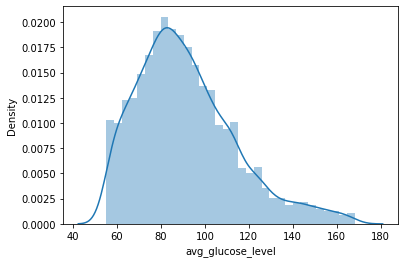

In [ ]:
sns.distplot(df['avg_glucose_level'])

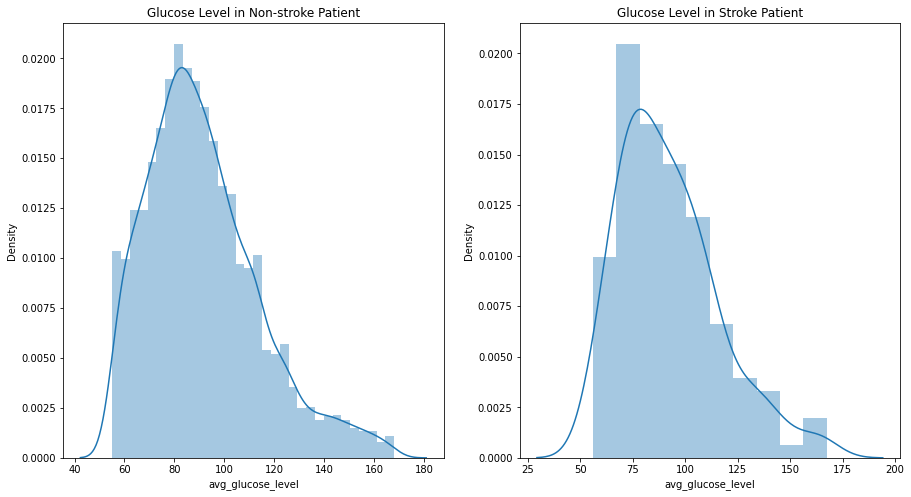

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['stroke']==0]['avg_glucose_level'],ax=ax[0])
ax[0].set_title('Glucose Level in Non-stroke Patient')
sns.distplot(df[df['stroke']==1]['avg_glucose_level'],ax=ax[1])
ax[1].set_title('Glucose Level in Stroke Patient')
plt.show()

**Analysis**

Stroke patients tend to have a blood sugar level of 75-100, as well as patients without strokes

### BMI

In [ ]:
print('Highest BMI is:',df['bmi'].max())
print('Lowest BMI Level is:',df['bmi'].min())
print('Average BMI Level is:',df['bmi'].mean())

Highest BMI is: 97.6
Lowest BMI Level is: 10.3
Average BMI Level is: 28.314489748905782


In [ ]:
df['bmi'] = pd.cut(x=df['bmi'], bins=[0,18.4,24.9,29.9,100],
                     labels=['Underweight','Healthy','Overweight', 'Obese'])

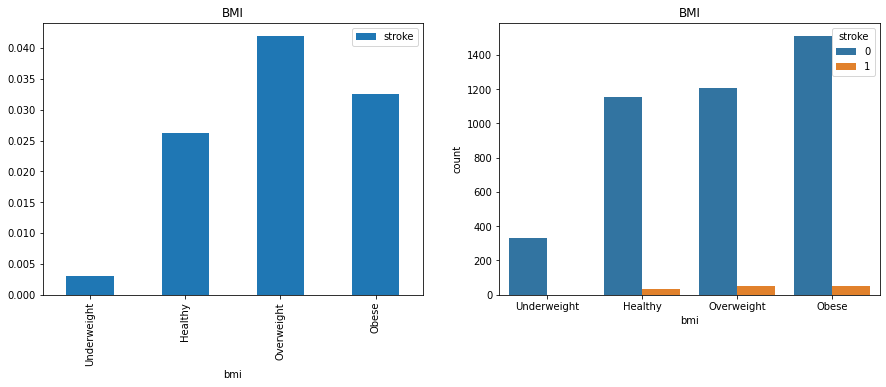

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,5))
df[['bmi','stroke']].groupby(['bmi']).mean().plot.bar(ax=ax[0])
ax[0].set_title('BMI')
sns.countplot('bmi',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('BMI')
plt.show()

**Analysis**

Patients in the Overweight BMI category have the highest stroke tendency than the Obese category

### Smoking Status

In [ ]:
df.groupby(['smoking_status', 'stroke'])['stroke'].count()

smoking_status   stroke
Unknown          0         1378
                 1           22
formerly smoked  0          649
                 1           36
never smoked     0         1552
                 1           54
smokes           0          626
                 1           24
Name: stroke, dtype: int64

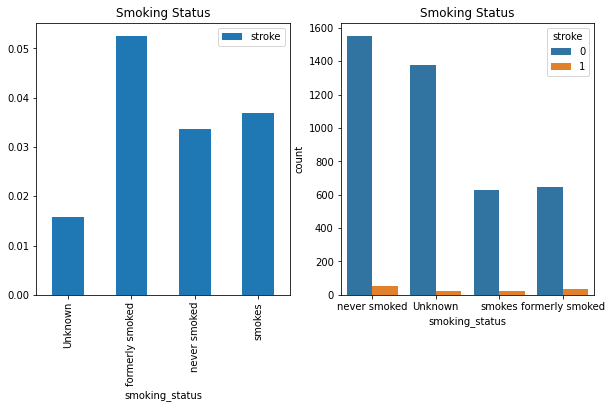

In [ ]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df[['smoking_status','stroke']].groupby(['smoking_status']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Smoking Status')
sns.countplot('smoking_status',hue='stroke',data=df,ax=ax[1])
ax[1].set_title('Smoking Status')
plt.show()

**Analysis**

Based on the smoking status, the most likely to suffer from stroke is patient that are formerly smoked

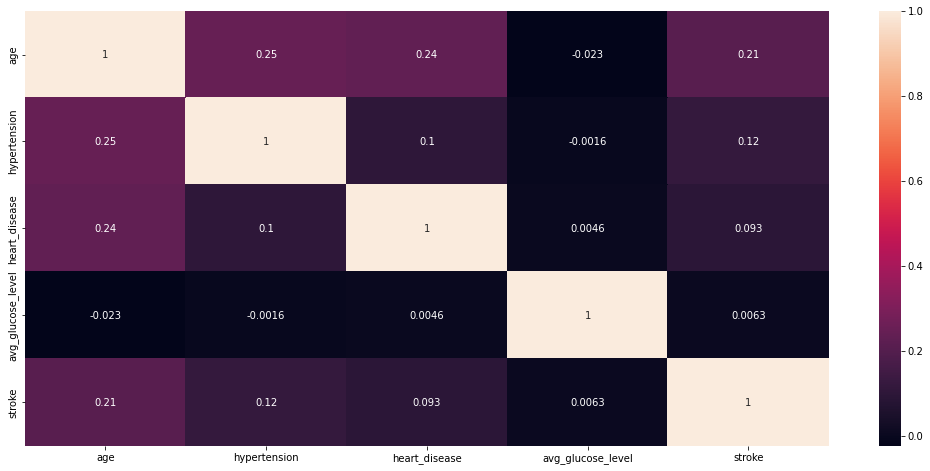

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))
sns.heatmap(df.corr(), annot = True);

# Data Preprocessing

## Convert Categorical Features

In [ ]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print('Jumlah Numerical Features: ', len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == 'object'].index
print('Jumlah Categorical Features: ', len(categorical_feats))

Jumlah Numerical Features:  6
Jumlah Categorical Features:  5


In [ ]:
print(df[numerical_feats].columns)
print('*'*75)
print(df[categorical_feats].columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')
***************************************************************************
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


### One Hot Encoding for Nominal Data

In [ ]:
dum_df_gender = pd.get_dummies(df, columns=["gender"], prefix=["gender_is"] )
dum_df_gender.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_is_Female,gender_is_Male
1,80.0,0,1,Yes,Private,Rural,105.92,Obese,never smoked,1,0,1
5,74.0,1,1,Yes,Private,Rural,70.09,Overweight,never smoked,1,0,1
6,69.0,0,0,No,Private,Urban,94.39,Healthy,never smoked,1,1,0
7,78.0,0,0,Yes,Private,Urban,58.57,Healthy,Unknown,1,1,0
8,81.0,1,0,Yes,Private,Rural,80.43,Overweight,never smoked,1,1,0


In [ ]:
df = dum_df_gender
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_is_Female,gender_is_Male
1,80.0,0,1,Yes,Private,Rural,105.92,Obese,never smoked,1,0,1
5,74.0,1,1,Yes,Private,Rural,70.09,Overweight,never smoked,1,0,1
6,69.0,0,0,No,Private,Urban,94.39,Healthy,never smoked,1,1,0
7,78.0,0,0,Yes,Private,Urban,58.57,Healthy,Unknown,1,1,0
8,81.0,1,0,Yes,Private,Rural,80.43,Overweight,never smoked,1,1,0


In [ ]:
dum_df_ever_married = pd.get_dummies(df, columns=["ever_married"], prefix=["ever_married_is"] )
dum_df_ever_married.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes
1,80.0,0,1,Private,Rural,105.92,Obese,never smoked,1,0,1,0,1
5,74.0,1,1,Private,Rural,70.09,Overweight,never smoked,1,0,1,0,1
6,69.0,0,0,Private,Urban,94.39,Healthy,never smoked,1,1,0,1,0
7,78.0,0,0,Private,Urban,58.57,Healthy,Unknown,1,1,0,0,1
8,81.0,1,0,Private,Rural,80.43,Overweight,never smoked,1,1,0,0,1


In [ ]:
df = dum_df_ever_married
df.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes
1,80.0,0,1,Private,Rural,105.92,Obese,never smoked,1,0,1,0,1
5,74.0,1,1,Private,Rural,70.09,Overweight,never smoked,1,0,1,0,1
6,69.0,0,0,Private,Urban,94.39,Healthy,never smoked,1,1,0,1,0
7,78.0,0,0,Private,Urban,58.57,Healthy,Unknown,1,1,0,0,1
8,81.0,1,0,Private,Rural,80.43,Overweight,never smoked,1,1,0,0,1


In [ ]:
dum_df_work_type = pd.get_dummies(df, columns=["work_type"], prefix=["work_type"] )
dum_df_work_type.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1,80.0,0,1,Rural,105.92,Obese,never smoked,1,0,1,0,1,0,0,1,0,0
5,74.0,1,1,Rural,70.09,Overweight,never smoked,1,0,1,0,1,0,0,1,0,0
6,69.0,0,0,Urban,94.39,Healthy,never smoked,1,1,0,1,0,0,0,1,0,0
7,78.0,0,0,Urban,58.57,Healthy,Unknown,1,1,0,0,1,0,0,1,0,0
8,81.0,1,0,Rural,80.43,Overweight,never smoked,1,1,0,0,1,0,0,1,0,0


In [ ]:
df = dum_df_work_type
df.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1,80.0,0,1,Rural,105.92,Obese,never smoked,1,0,1,0,1,0,0,1,0,0
5,74.0,1,1,Rural,70.09,Overweight,never smoked,1,0,1,0,1,0,0,1,0,0
6,69.0,0,0,Urban,94.39,Healthy,never smoked,1,1,0,1,0,0,0,1,0,0
7,78.0,0,0,Urban,58.57,Healthy,Unknown,1,1,0,0,1,0,0,1,0,0
8,81.0,1,0,Rural,80.43,Overweight,never smoked,1,1,0,0,1,0,0,1,0,0


In [ ]:
dum_df_residence_type = pd.get_dummies(df, columns=["Residence_type"], prefix=["Residence_type"] )
dum_df_residence_type.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
1,80.0,0,1,105.92,Obese,never smoked,1,0,1,0,1,0,0,1,0,0,1,0
5,74.0,1,1,70.09,Overweight,never smoked,1,0,1,0,1,0,0,1,0,0,1,0
6,69.0,0,0,94.39,Healthy,never smoked,1,1,0,1,0,0,0,1,0,0,0,1
7,78.0,0,0,58.57,Healthy,Unknown,1,1,0,0,1,0,0,1,0,0,0,1
8,81.0,1,0,80.43,Overweight,never smoked,1,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
df = dum_df_residence_type
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban
1,80.0,0,1,105.92,Obese,never smoked,1,0,1,0,1,0,0,1,0,0,1,0
5,74.0,1,1,70.09,Overweight,never smoked,1,0,1,0,1,0,0,1,0,0,1,0
6,69.0,0,0,94.39,Healthy,never smoked,1,1,0,1,0,0,0,1,0,0,0,1
7,78.0,0,0,58.57,Healthy,Unknown,1,1,0,0,1,0,0,1,0,0,0,1
8,81.0,1,0,80.43,Overweight,never smoked,1,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
dum_df_smoking_status = pd.get_dummies(df, columns=["smoking_status"], prefix=["smoking_status"] )
dum_df_smoking_status.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,80.0,0,1,105.92,Obese,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
5,74.0,1,1,70.09,Overweight,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
6,69.0,0,0,94.39,Healthy,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7,78.0,0,0,58.57,Healthy,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
8,81.0,1,0,80.43,Overweight,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


In [ ]:
df = dum_df_smoking_status
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,80.0,0,1,105.92,Obese,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
5,74.0,1,1,70.09,Overweight,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
6,69.0,0,0,94.39,Healthy,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7,78.0,0,0,58.57,Healthy,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
8,81.0,1,0,80.43,Overweight,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0


### Label Encoding for Ordinal Data

In [ ]:
df['bmi'].replace(['Underweight','Healthy','Overweight','Obese'],[0,1,2,3],inplace=True)

## Stratified Sampling

In [ ]:
df['stroke'].value_counts()

0    4205
1     136
Name: stroke, dtype: int64

In [ ]:
(df['stroke'].value_counts()) / len(df) * 100

0    96.867081
1     3.132919
Name: stroke, dtype: float64

In [ ]:
df.groupby('stroke', group_keys=False).apply(lambda x: x.sample(100))

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1188,45.0,0,0,81.02,3,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1600,62.0,0,0,62.56,3,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4399,53.0,0,0,85.46,3,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
276,61.0,0,0,69.15,2,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
2690,71.0,0,1,98.45,2,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,79.0,1,0,98.02,1,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
36,82.0,0,1,144.90,2,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
136,70.0,1,0,89.13,3,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,0
170,78.0,0,0,90.19,2,1,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [ ]:
df.groupby('stroke', group_keys=False).apply(lambda x: x.sample(frac=0.01))

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_is_Female,gender_is_Male,ever_married_is_No,ever_married_is_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3764,39.00,0,0,62.02,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,1
2473,52.00,0,0,126.68,2,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1248,50.00,0,1,85.82,3,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
2359,38.00,0,0,100.02,2,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
3434,48.00,0,0,124.64,2,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3803,20.00,0,0,59.67,2,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
938,0.24,0,0,118.87,0,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
4777,50.00,0,0,112.25,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3756,1.80,0,0,85.16,1,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
2569,46.00,0,0,112.29,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,0


## Split Data

In [ ]:
x = df.drop(['stroke'],axis=1)
y = df['stroke']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Imbalance Data Handling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(sampling_strategy=1)
x_under, y_under = undersampling.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter
Counter(y_under)

Counter({0: 109, 1: 109})

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Melakukan Scaling ke dataset kita
scaler = MinMaxScaler()
x_under = scaler.fit_transform(x_under)
x_test = scaler.transform(x_test)

# Modelling Methods

In [ ]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

## KNN

In [ ]:
#Sebelum hyperparametertuning
# Instantiate a KNNClassifier 'knn' with a 20 neighbors
knn = KNeighborsClassifier()

# Fit knn to the training set
knn.fit(x_under, y_under)

# Predict test set labels
y_pred_knn = knn.predict(x_test)
print ('hasil akurasi dari data training: ', knn.score(x_under, y_under))
print ('hasil akurasi dari data testing: ', knn.score(x_test, y_test))

hasil akurasi dari data training:  0.7339449541284404
hasil akurasi dari data testing:  0.6939010356731876


In [ ]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

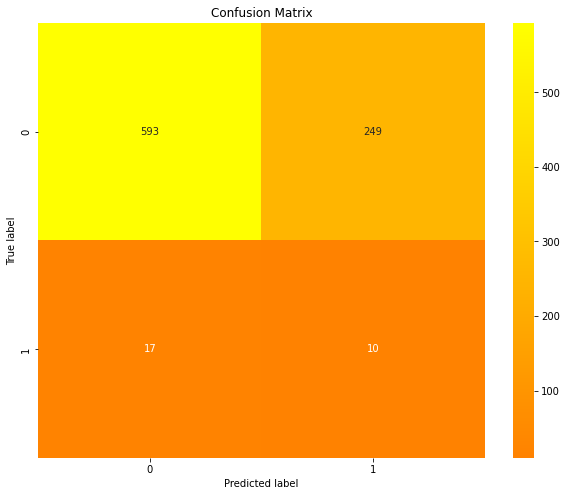

precision score : 0.03861003861003861
recall score : 0.37037037037037035


In [ ]:
cm_knn = confusion_matrix(y_test,y_pred_knn)
draw_confusion_matrix(cm_knn)
print('precision score :' , precision_score(y_test,y_pred_knn))
print('recall score :' , recall_score(y_test,y_pred_knn))

## Logistic Regression

In [ ]:
# Instantiate logreg
logreg = LogisticRegression()

# Fit logreg to the training set
logreg.fit(x_under, y_under)

# Predict test set labels
y_pred_logreg = logreg.predict(x_test)

print ('hasil akurasi dari data training: ', logreg.score(x_under, y_under))
print ('hasil akurasi dari data testing: ', logreg.score(x_test, y_test))

hasil akurasi dari data training:  0.7110091743119266
hasil akurasi dari data testing:  0.7272727272727273


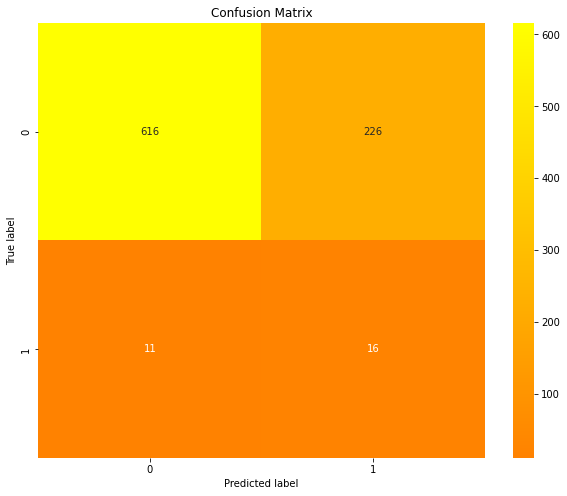

precision score : 0.06611570247933884
recall score : 0.5925925925925926


In [ ]:
cm_logreg = confusion_matrix(y_test,y_pred_logreg)
draw_confusion_matrix(cm_logreg)
print('precision score :' , precision_score(y_test,y_pred_logreg))
print('recall score :' , recall_score(y_test,y_pred_logreg))

## Decision Tree

In [ ]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 10
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(x_under, y_under)

# Predict test set labels
y_pred_dt = dt.predict(x_test)

print ('hasil akurasi dari data training: ', dt.score(x_under, y_under))
print ('hasil akurasi dari data testing: ', dt.score(x_test, y_test))

hasil akurasi dari data training:  1.0
hasil akurasi dari data testing:  0.6524741081703107


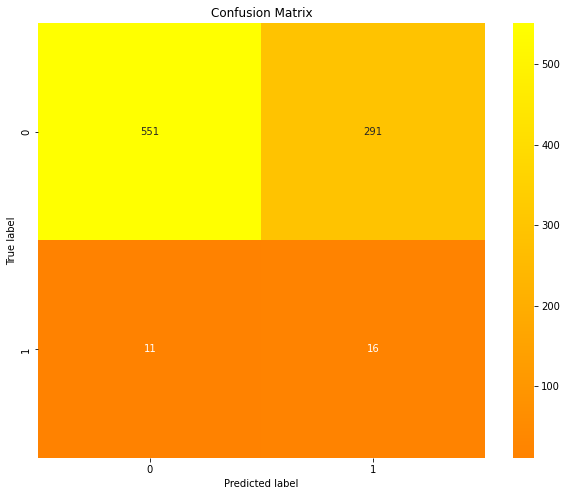

precision score : 0.05211726384364821
recall score : 0.5925925925925926


In [ ]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
draw_confusion_matrix(cm_dt)
print('precision score :' , precision_score(y_test,y_pred_dt))
print('recall score :' , recall_score(y_test,y_pred_dt))

## Random Forest

In [ ]:
# Instantiate a RandomForestClassifier 'rf' with number of tree 15
rf = RandomForestClassifier()

# Fit dt to the training set
rf.fit(x_under, y_under)

# Predict test set labels
y_pred_rf = rf.predict(x_test)

print ('hasil akurasi dari data training: ', rf.score(x_under, y_under))
print ('hasil akurasi dari data testing: ', rf.score(x_test, y_test))

hasil akurasi dari data training:  1.0
hasil akurasi dari data testing:  0.7019562715765247


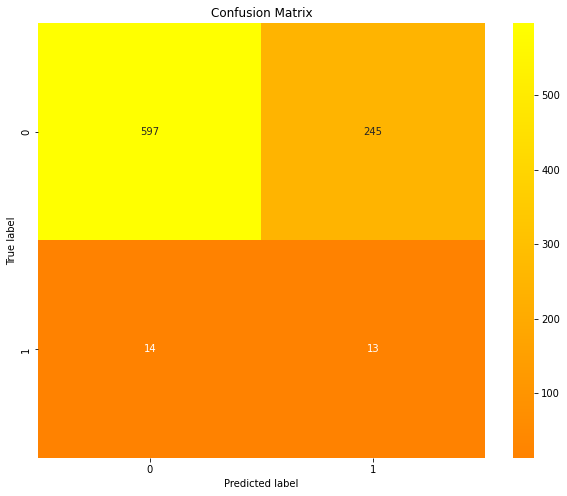

precision score : 0.050387596899224806
recall score : 0.48148148148148145


In [ ]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
draw_confusion_matrix(cm_rf)
print('precision score :' , precision_score(y_test,y_pred_rf))
print('recall score :' , recall_score(y_test,y_pred_rf))

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier,plot_importance

In [ ]:
#sebelum hyperparametertuning
light = LGBMClassifier()
light.fit(x_under,y_under)

y_pred_gbm = light.predict(x_test)

print ('hasil akurasi dari data training: ', light.score(x_under, y_under))
print ('hasil akurasi dari data testing: ', light.score(x_test, y_test))

hasil akurasi dari data training:  0.9220183486238532
hasil akurasi dari data testing:  0.7019562715765247


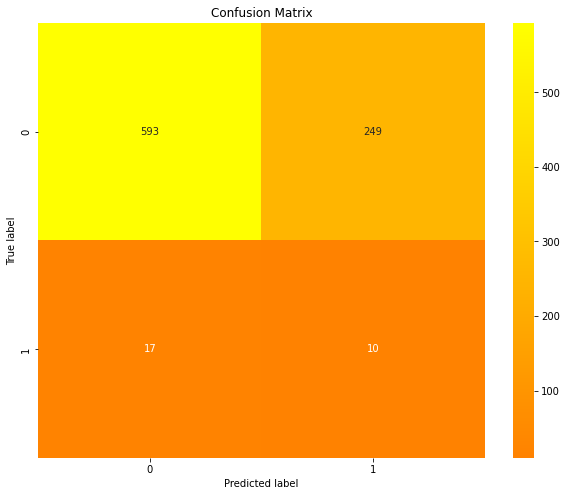

precision score : 0.05725190839694656
recall score : 0.5555555555555556


In [ ]:
cm_ = confusion_matrix(y_test,y_pred_gbm)
draw_confusion_matrix(cm_knn)
print('precision score :' , precision_score(y_test,y_pred_gbm))
print('recall score :' , recall_score(y_test,y_pred_gbm))

## XGBoost

In [ ]:
# pip
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# Fit
xgb.fit(x_under, y_under)

# Predict
y_pred_xgb = xgb.predict(x_test)

print ('hasil akurasi dari data training: ', xgb.score(x_under, y_under))
print ('hasil akurasi dari data testing: ', xgb.score(x_test, y_test))

hasil akurasi dari data training:  0.8990825688073395
hasil akurasi dari data testing:  0.6904487917146145


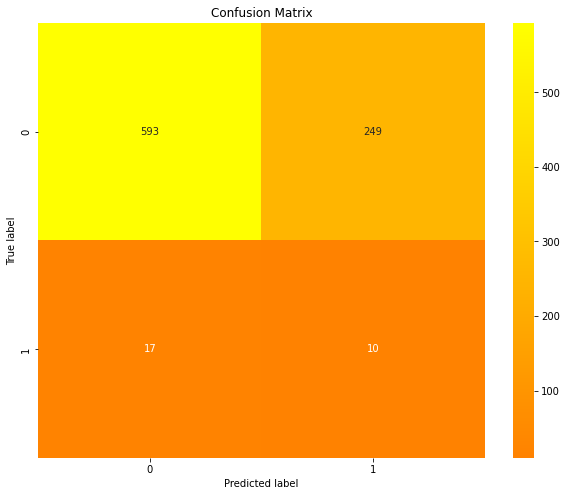

precision score : 0.058394160583941604
recall score : 0.5925925925925926


In [ ]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
draw_confusion_matrix(cm_knn)
print('precision score :' , precision_score(y_test,y_pred_xgb))
print('recall score :' , recall_score(y_test,y_pred_xgb))

# Hyperparameter Tuning

Out of all models conducted, XGBoost is considerated as the best model because it has the highest recall score.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    'n_estimators': range(50, 250, 50),
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init Grid Search
grid_cv = GridSearchCV(xgb, param_grid=parameters,scoring="roc_auc")

# Fit
_ = grid_cv.fit(x_train, y_train)
print(grid_cv.best_estimator_)

XGBClassifier(n_estimators=50)


In [ ]:
import xgboost as xgb

xgb = xgb.XGBClassifier(n_estimators = 50)
# Fit
xgb.fit(x_under, y_under)

# Predict
y_pred_xgb = xgb.predict(x_test)

print ('hasil akurasi dari data training: ', xgb.score(x_under, y_under))
print ('hasil akurasi dari data testing: ', xgb.score(x_test, y_test))

hasil akurasi dari data training:  0.8119266055045872
hasil akurasi dari data testing:  0.7077100115074798


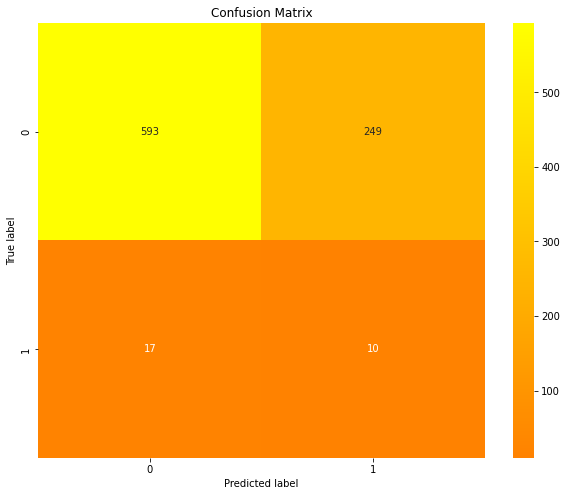

precision score : 0.06513409961685823
recall score : 0.6296296296296297


In [ ]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
draw_confusion_matrix(cm_knn)
print('precision score :' , precision_score(y_test,y_pred_xgb))
print('recall score :' , recall_score(y_test,y_pred_xgb))

# Model Analysis and Interpretation

Precision and recall scores have very far comparisons in each model. A low precision value indicates a high FP, while a high recall value indicates a low FN. It is suspected that because the data is still imbalanced where there are more negative classes than positive classes, it is highly probable that the model to predict the actual negative data is in the positive class, causing a high FP value.

The best model is XGBoost, so hyperparameter tuning is performed on the model and the data testing score is 70% and the highest recall score is 63%. Recall is the most considered evaluation because considering the business goal is medical testing, so it is better to predict a healthy patient from having a stroke than vice versa.

# Feature Importance

Text(0.5, 1.0, 'Feature Importance based on Decision Tree')

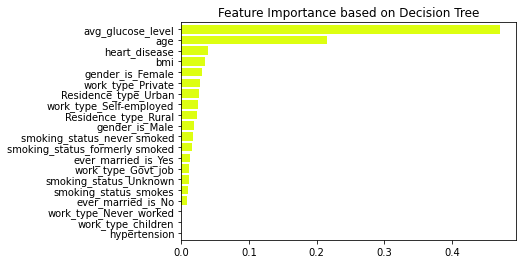

In [ ]:
f,ax=plt.subplots()
model=dt
model.fit(x,y)
pd.Series(model.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#ddff11').set_title('Feature Importance based on Decision Tree')

Text(0.5, 1.0, 'Feature Importance in Random Forests')

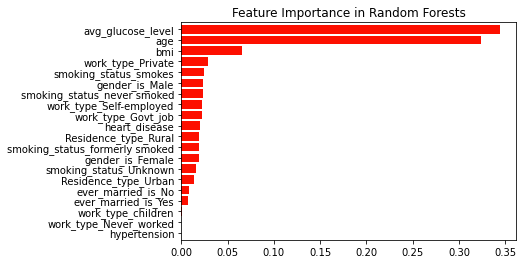

In [ ]:
f,ax=plt.subplots()
model=RandomForestClassifier(n_estimators=15)
model.fit(x,y)
pd.Series(model.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8,color='#FD0F00').set_title('Feature Importance in Random Forests')

Featue importance analysis shows that the 3 features that most influence receipts are age, sugar level, and BMI.